# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

In [4]:
# resposta 1
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
#import altair as alt
#from vega_datasets import data

poke = pd.read_csv('Pokemon.csv')
poke.head(5)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


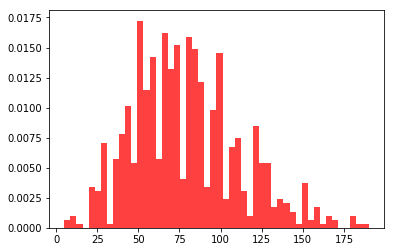

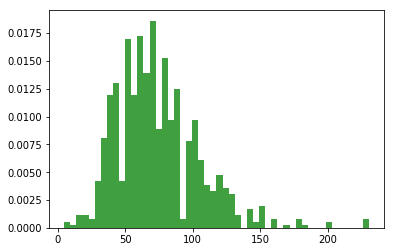

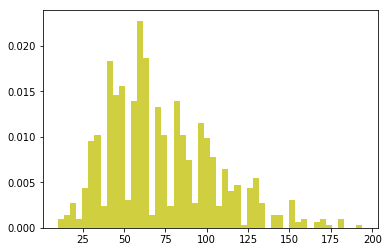

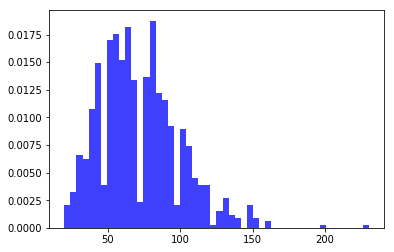

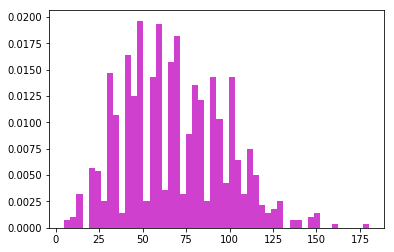

In [5]:
MediaAttack = poke['Attack'].mean()
MediaAttack
poke['Attack'].fillna(poke['Attack'].mean(), inplace=True)  
histogram_example = plt.hist(poke['Attack'], 50,density= True, facecolor= 'r',alpha = 0.75)

plt.show()

MediaDefense = poke['Defense'].mean()
MediaDefense
poke['Defense'].fillna(poke['Defense'].mean(), inplace=True)
histogram_example2 = plt.hist(poke['Defense'],50,density= True, facecolor= 'g',alpha = 0.75) 
plt.show()

MediaSpAtk = poke['Sp. Atk'].mean()
MediaSpAtk
poke['Sp. Atk'].fillna(poke['Sp. Atk'].mean(), inplace=True)
histogram_example3 = plt.hist(poke['Sp. Atk'],50,density= True, facecolor= 'y',alpha = 0.75) 
plt.show()

MediaSpDef = poke['Sp. Def'].mean()
MediaSpDef
poke['Sp. Def'].fillna(poke['Sp. Def'].mean(), inplace=True)
histogram_example4 = plt.hist(poke['Sp. Def'], 50,density= True, facecolor= 'b',alpha = 0.75) 
plt.show()

MediaSpeed = poke['Speed'].mean()
MediaSpeed
poke['Speed'].fillna(poke['Speed'].mean(), inplace=True)
histogram_example5 = plt.hist(poke['Speed'],50,density= True, facecolor= 'm',alpha = 0.75) 
plt.show()

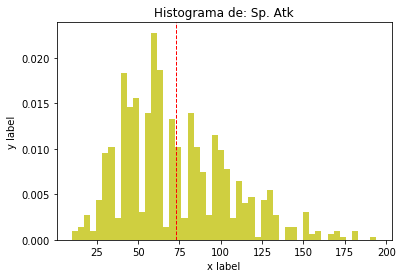

In [6]:
def Pokemonhist(df, atributo):
  plt.hist(df[atributo],50,density= True, facecolor= 'y',alpha = 0.75)    
  plt.xlabel('x label')
  plt.ylabel('y label')
  plt.title('Histograma de: ' + atributo)
  plt.axvline(df[atributo].mean(), color = 'r', linestyle='dashed', linewidth = 1)
   
 
Pokemonhist(poke,"Sp. Atk")

## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

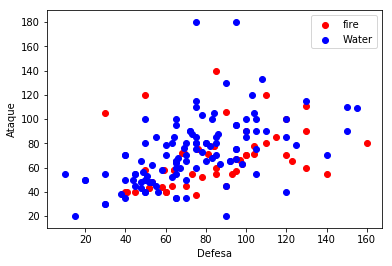

In [7]:
# resposta 2
PokeFire = poke[poke['Type 1']=='Fire'] #int(np.where(poke['Type 1']=='Fire'))
PokeWater = poke[poke['Type 1']=='Water'] #int(np.where(poke['Type 1']=='Water'))

#print((poke['Type 1']=='Fire').sum())
#print((poke['Type 1']=='Water').sum())

# N = 50
# z = np.random.rand(N)
# print(z)
plt.scatter(PokeFire['Attack'],  PokeFire['Defense'],  c= 'red',      label = 'fire')
plt.scatter(PokeWater['Attack'], PokeWater['Defense'], c= 'blue', label = 'Water')

plt.xlabel('Defesa')
plt.ylabel('Ataque')
plt.legend()

plt.show()


#plt.scatter(x,y)
#np.where(poke['Type 1']=='Fire')
#np.where(poke['Type 1']=='Water')

#df_fire = poke[poke['Type 1']=='Fire']
#df_water = poke[poke['Type 1']=='Water']



## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

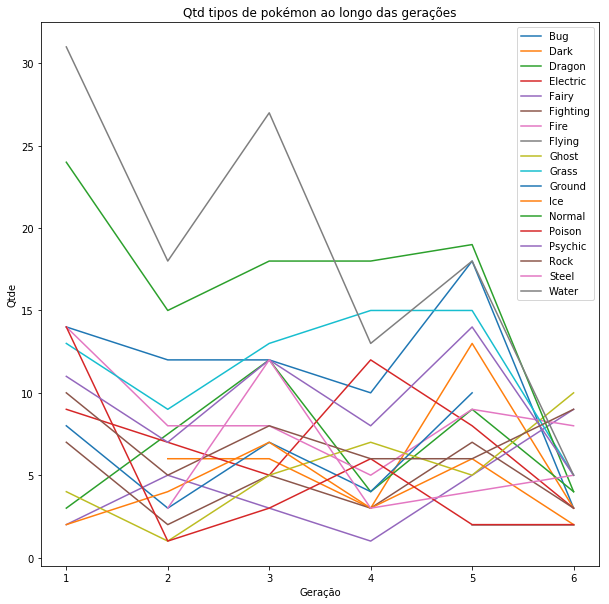

In [11]:
# resposta 3
Ggene = pd.DataFrame({'count' : poke.groupby(['Type 1','Generation']).size()}).reset_index()
plt.figure(figsize=(10,10)) 

for gen in Ggene['Type 1'].unique():
  geracao = Ggene[Ggene['Type 1']== gen]
  plt.plot(geracao['Generation'], geracao['count'], label=gen)
  plt.xlabel('Geração')
  plt.ylabel('Qtde')
  plt.title("Qtd tipos de pokémon ao longo das gerações")
  plt.legend()


## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


In [81]:
# resposta 4

Airports = data.airports()
Airports.head()

alt.Chart(Airports).transform_aggregate(count='count()', 
                                        groupby=['state']).transform_window(rank='rank(count)',
                                        sort=[alt.SortField('count', order='descending')]).transform_filter(
                                        alt.datum.rank < 6).mark_bar().encode( y=alt.Y('state:N',
                                        sort=alt.EncodingSortField(field='count', op='sum', order='descending') ),    x='count:Q',)

ModuleNotFoundError: No module named 'altair'

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


In [12]:
#Resposta 5
iris = data.iris()

w = alt.selection(type='interval')

chart1 = alt.Chart(iris).mark_point().encode(x='petalLength:Q', y='petalWidth:Q',color=alt.condition(w, 'species:O', alt.value('grey'))
                                               ).add_selection(w)

chart2 = alt.Chart(iris).mark_point().encode(x='sepalLength:Q', y='sepalWidth:Q', color=alt.condition(w, 'species:O', alt.value('grey'))
                                               ).add_selection(w)

chart1 | chart2


NameError: name 'data' is not defined

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

In [ ]:
# resposta 6

alt.Chart(poke).transform_aggregate(
                                    count='count()',
                                    groupby=['Type 1']).transform_window(rank='rank(count)',
                                    sort=[alt.SortField('count', order='descending')]
                                    ).mark_bar().encode(y=alt.Y('Type 1:N',sort=alt.EncodingSortField(field='count', op='sum', order='descending')
                                    ), x='count:Q',)

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

In [ ]:
# resposta 7

poke.head()

GRbarras = alt.Chart(poke).mark_bar().encode(x='count()', y='Generation', color='Legendary')
infos = alt.Chart(poke).mark_text(dx=-15, dy=3, color='white').encode(x=alt.X('count()):Q', stack='zero'), y=alt.Y('Generation:N'),
                                                                      detail='Legendary:N',text=alt.Text('count():Q', format='.1f')) 
GRbarras + infos